In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [30]:
analysis = scripts.Analysis()

In [31]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250',
                          'ighigh_7',
                          'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                          'midlatitude_summer',
                          'onetime_version')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [32]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250',
                               'ighigh_7',
                               'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                               'midlatitude_summer', 
                               'onetime_version')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [33]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 20 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [34]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [35]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [36]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [37]:
fig.display_hrefanchor()

In [38]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [39]:
table_dgdgs.display_hrefanchor()

In [40]:
for g in range(1, 20 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

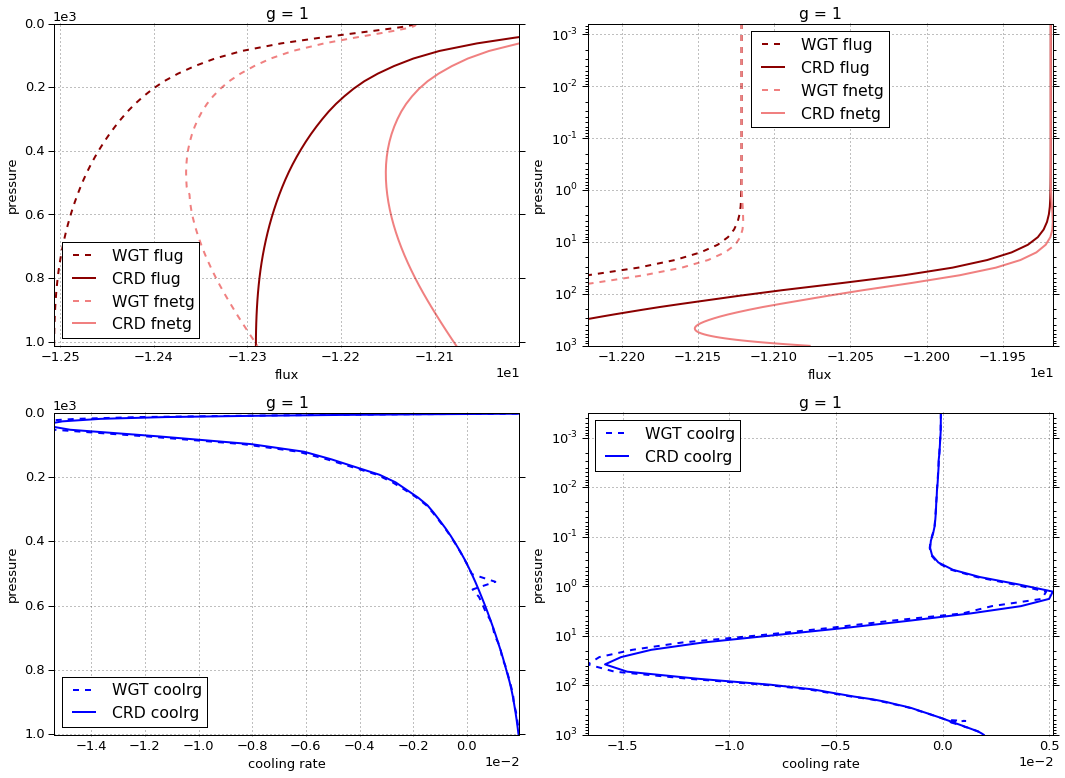

# Figure: flux, cooling rate. g-group 2

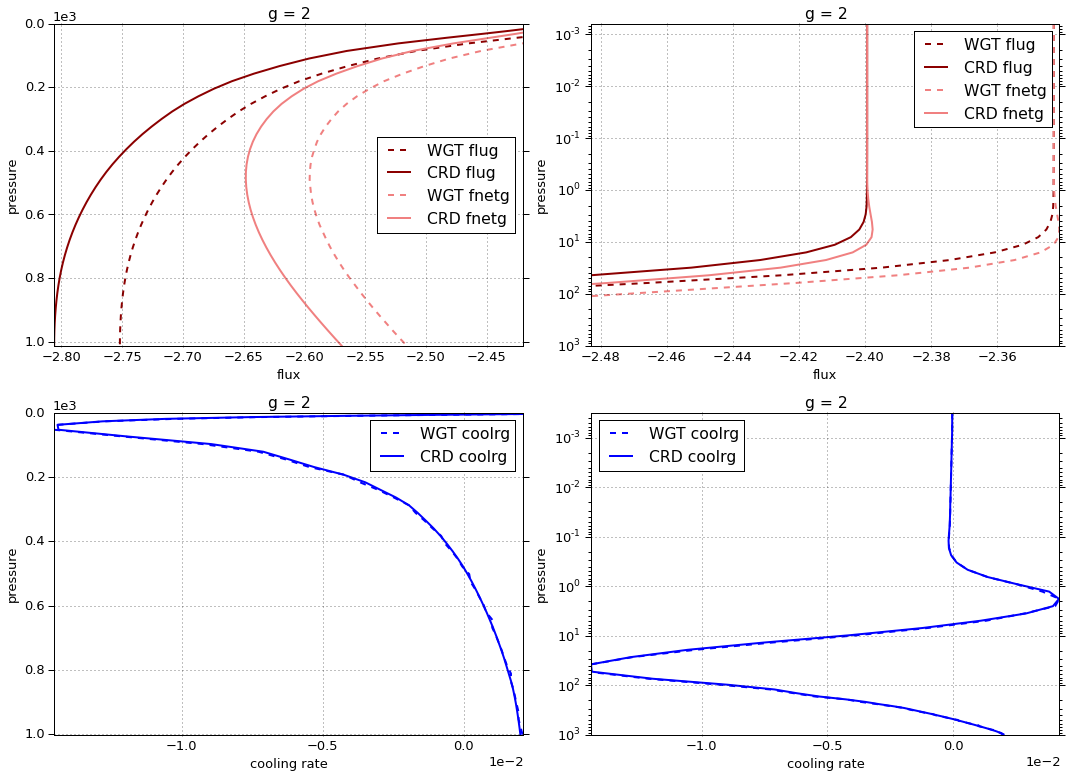

# Figure: flux, cooling rate. g-group 3

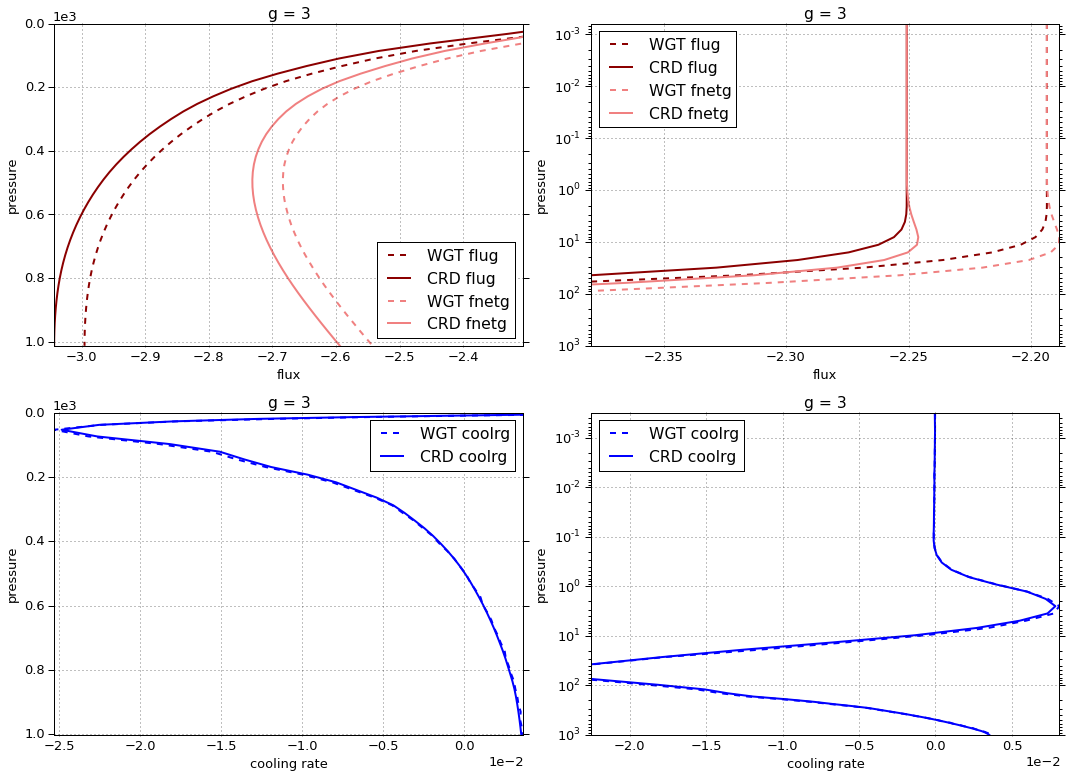

# Figure: flux, cooling rate. g-group 4

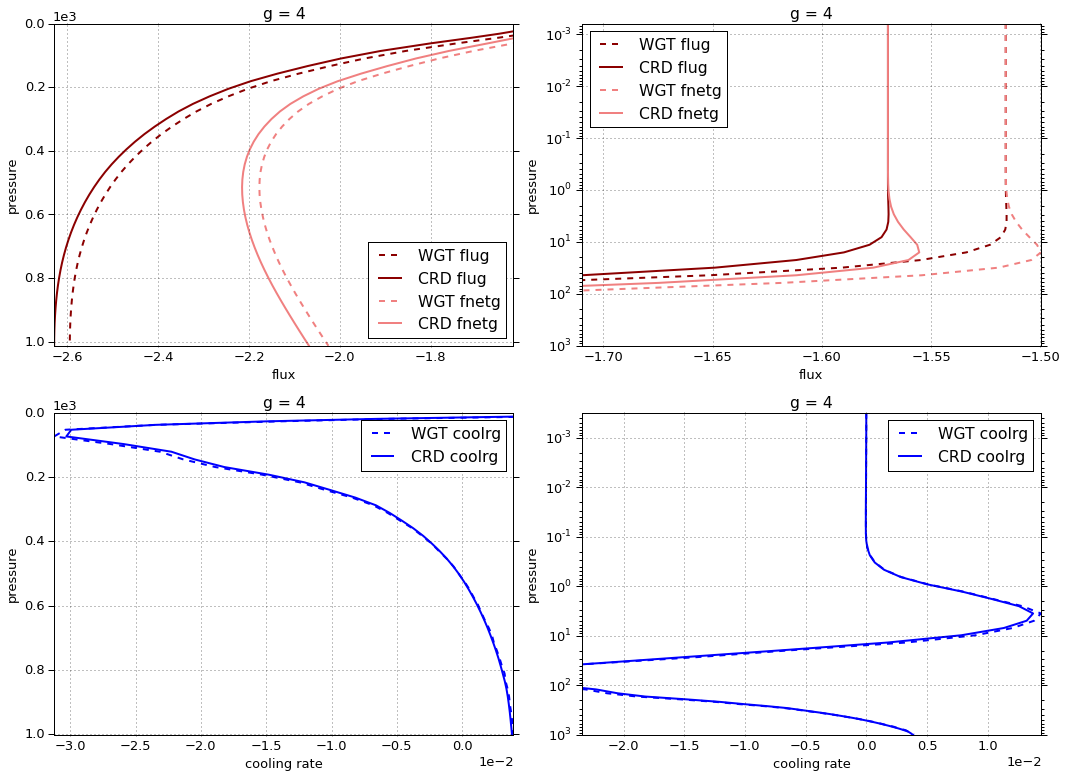

# Figure: flux, cooling rate. g-group 5

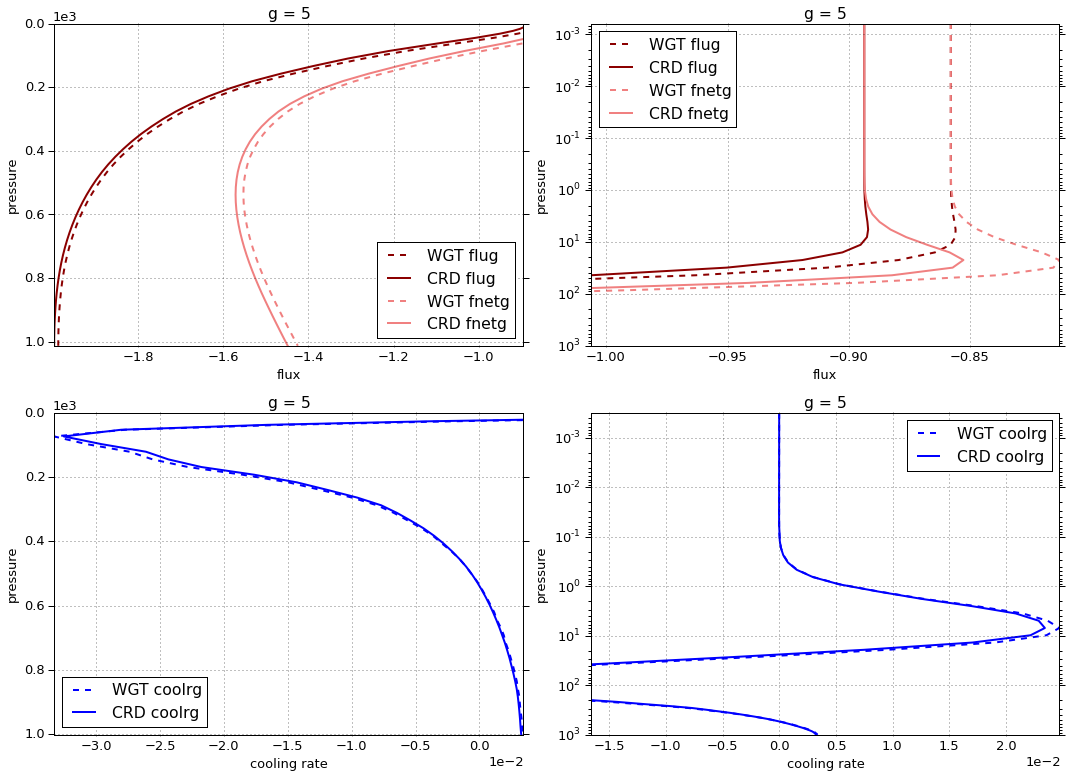

# Figure: flux, cooling rate. g-group 6

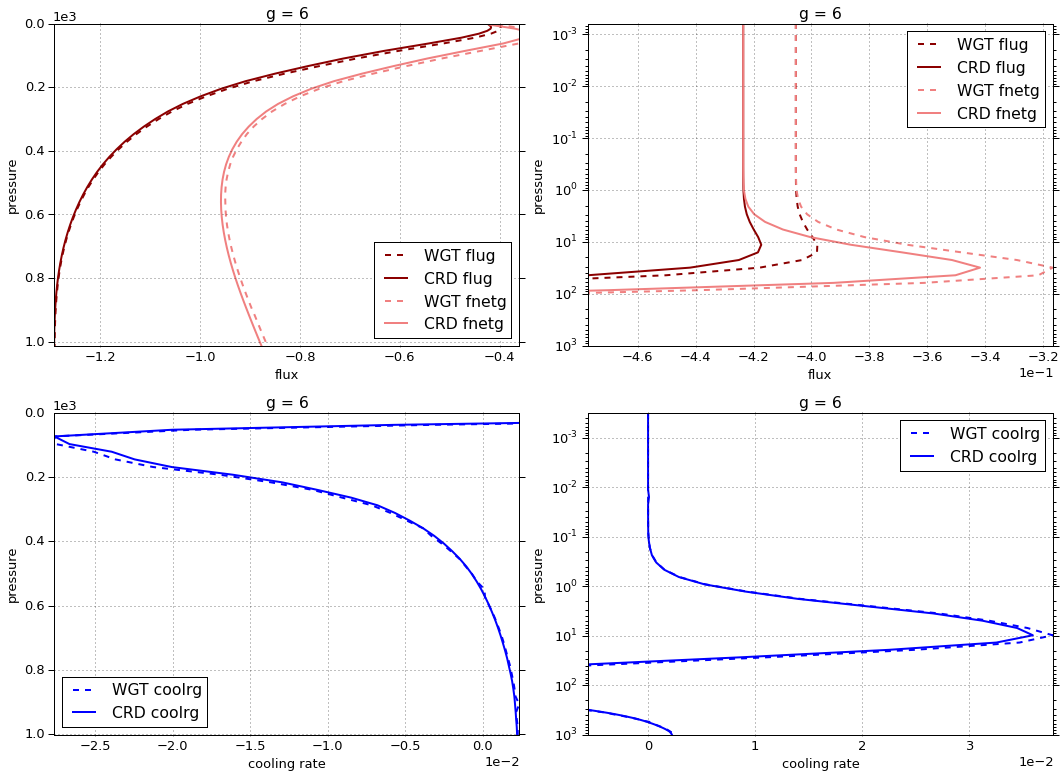

# Figure: flux, cooling rate. g-group 7

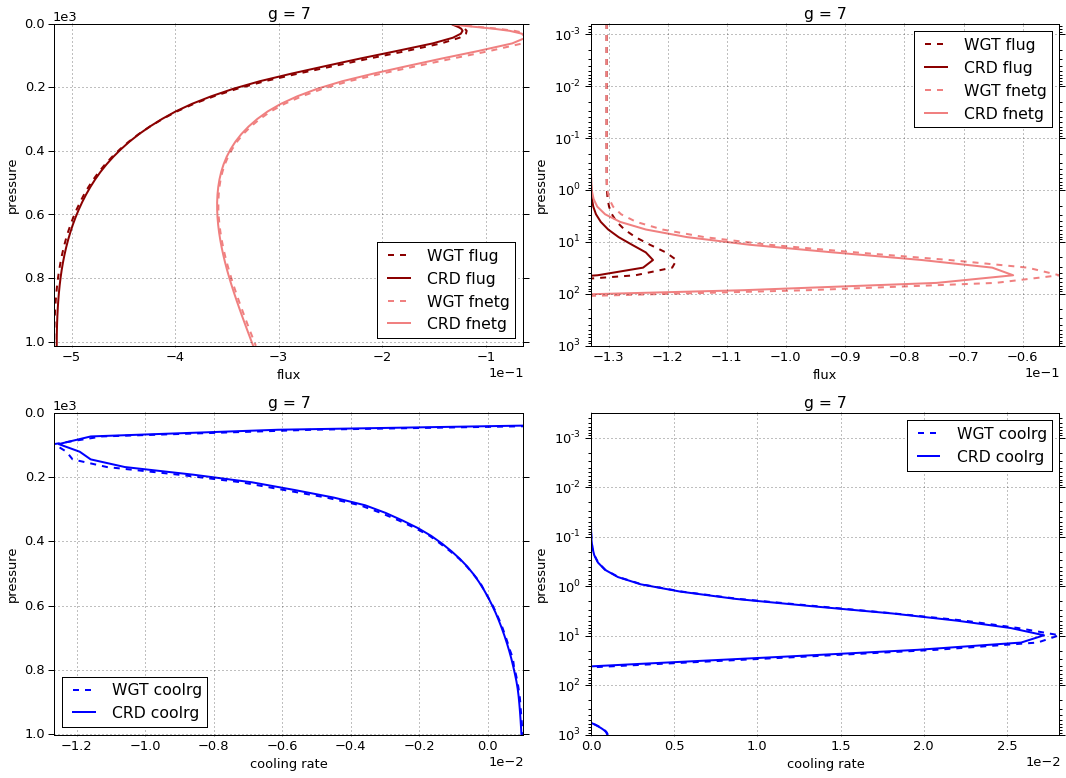

# Figure: flux, cooling rate. g-group 8

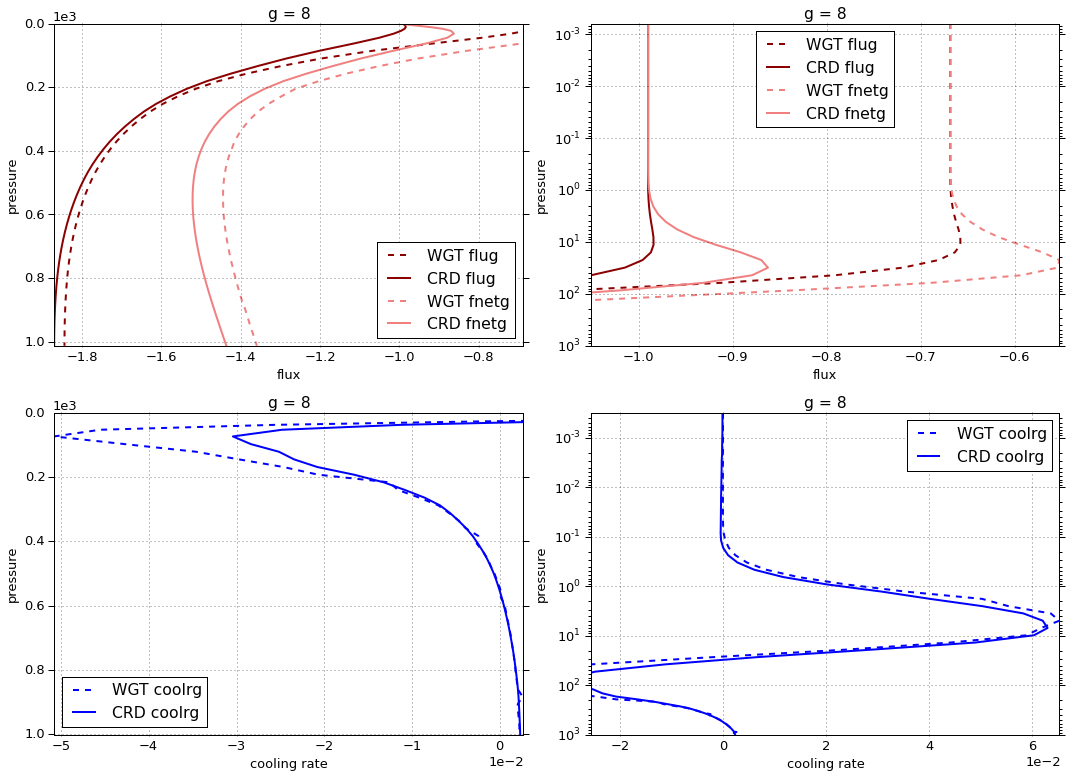

# Figure: flux, cooling rate. g-group 9

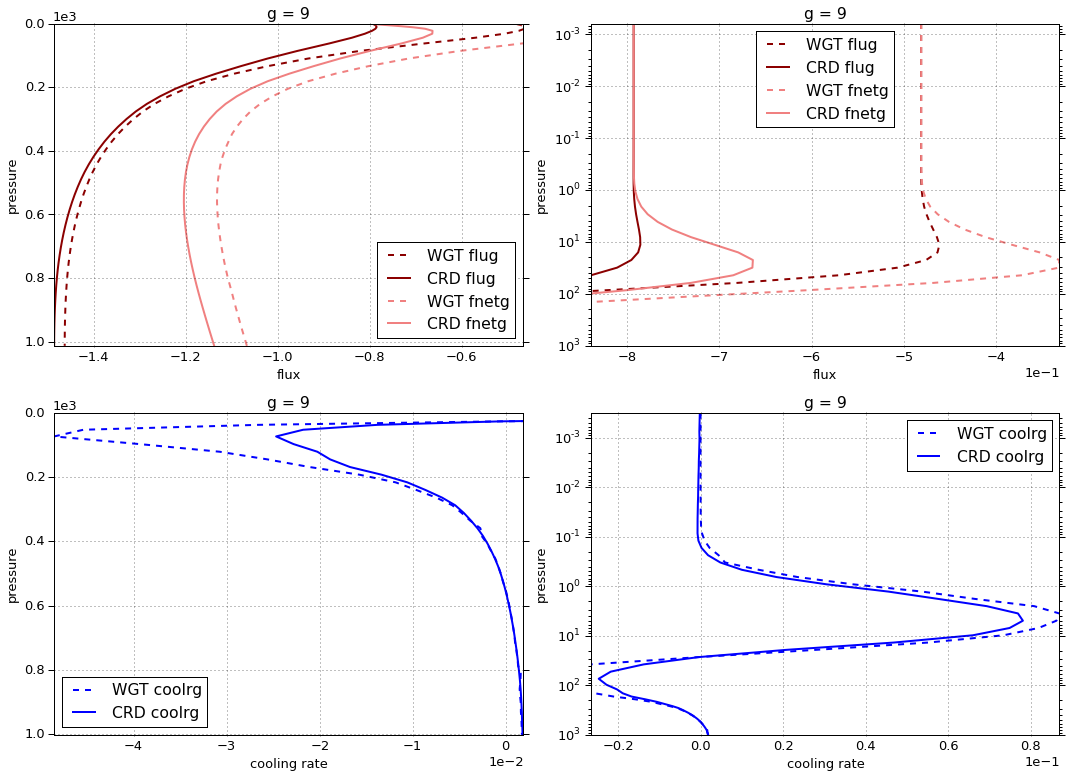

# Figure: flux, cooling rate. g-group 10

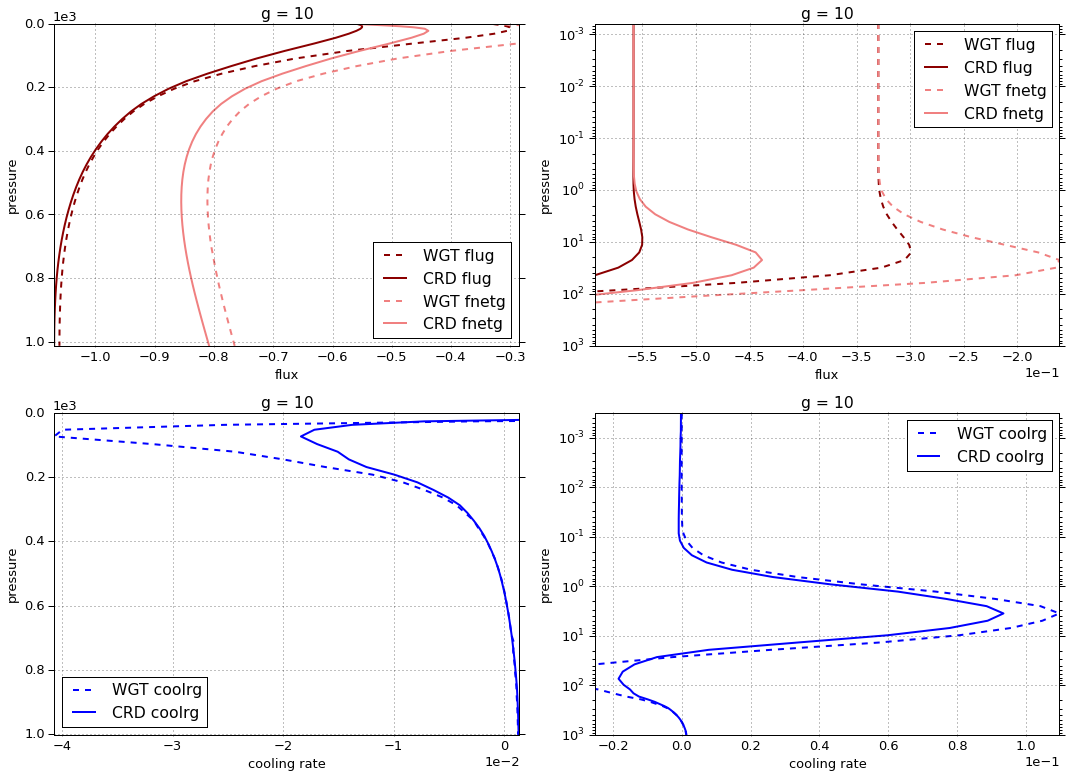

# Figure: flux, cooling rate. g-group 11

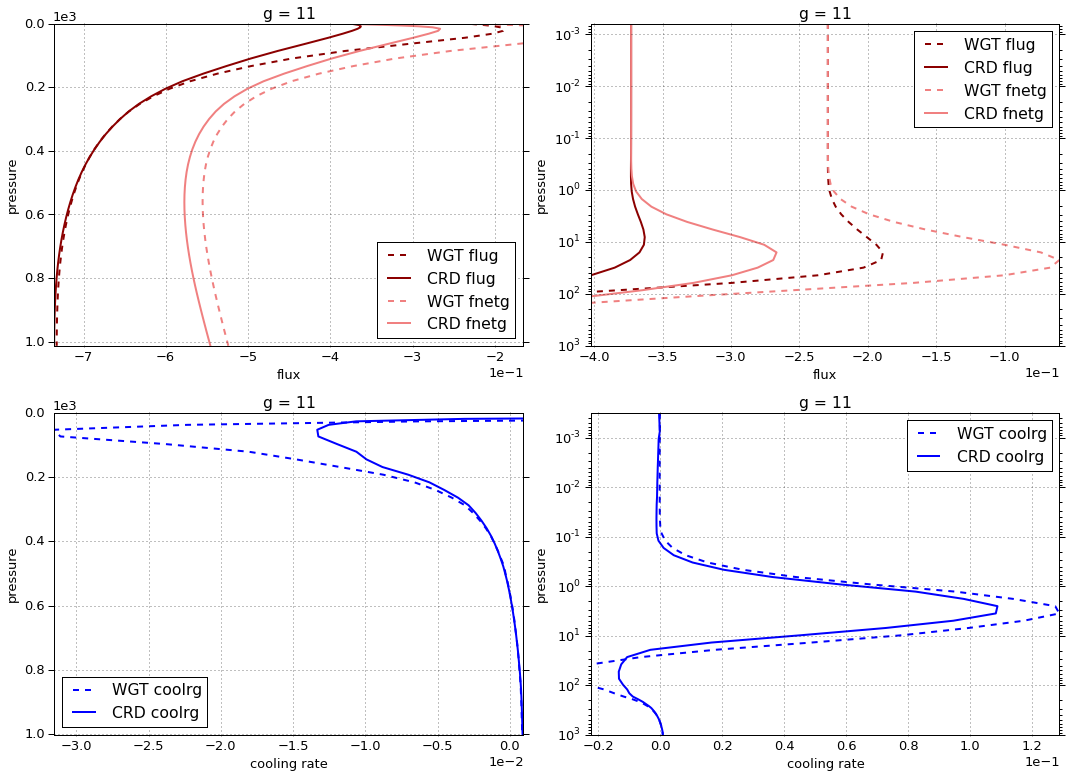

# Figure: flux, cooling rate. g-group 12

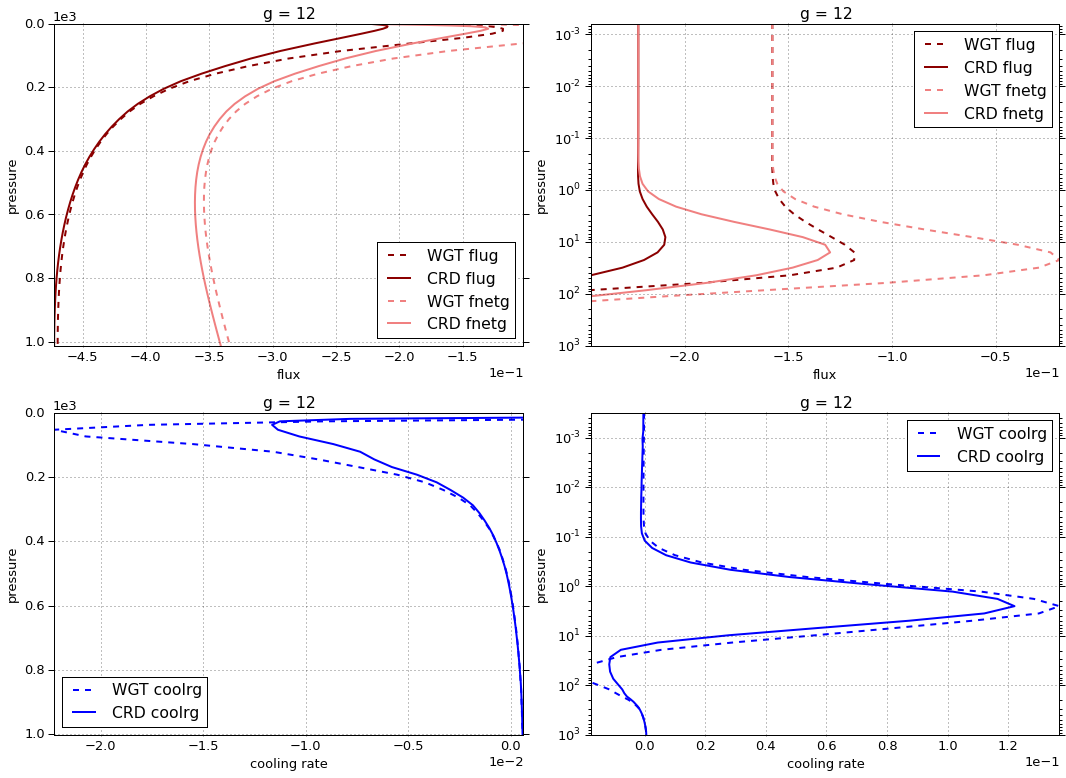

# Figure: flux, cooling rate. g-group 13

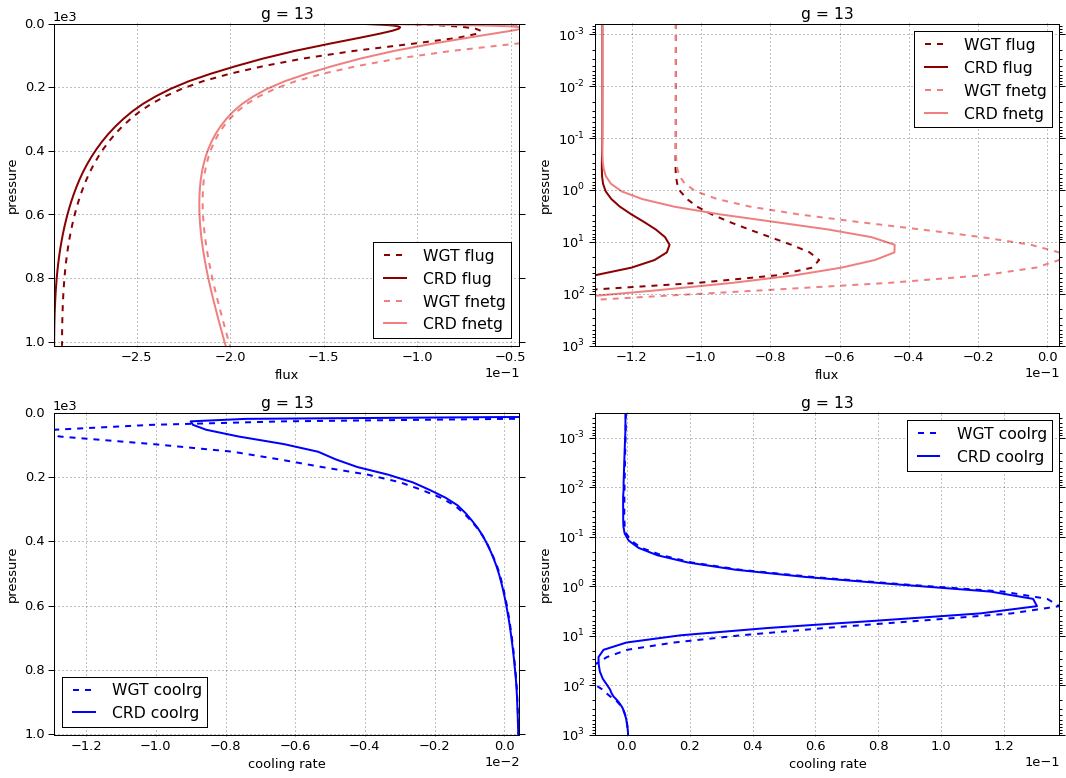

# Figure: flux, cooling rate. g-group 14

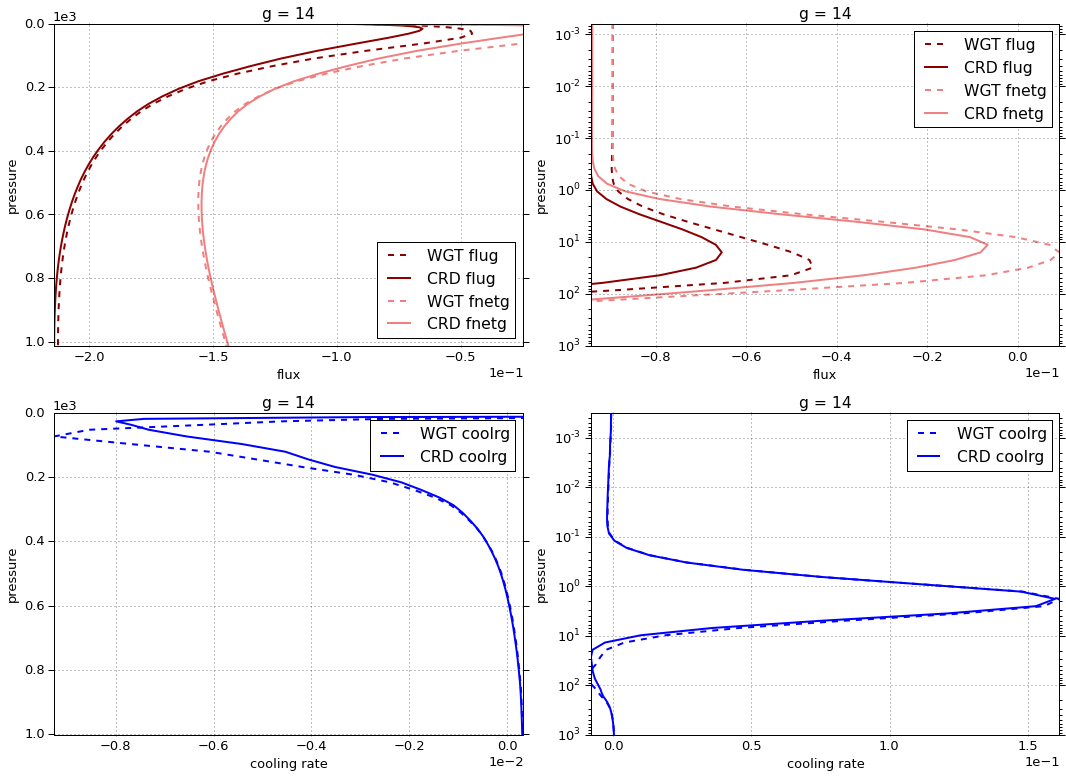

# Figure: flux, cooling rate. g-group 15

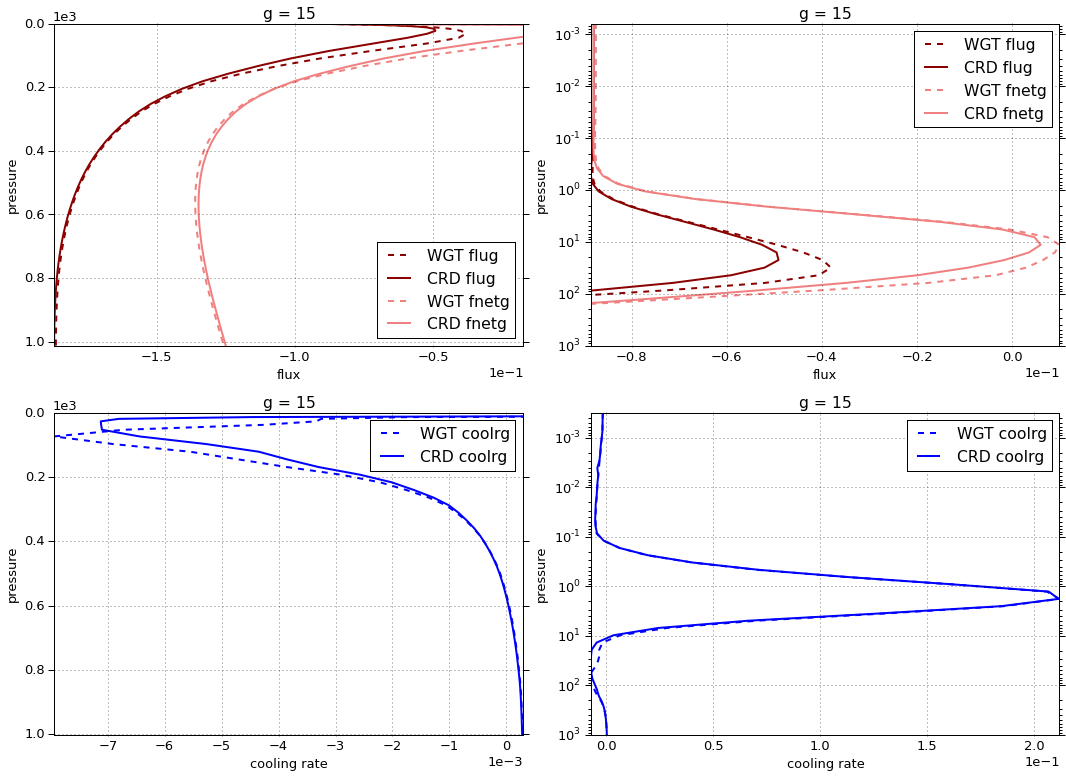

# Figure: flux, cooling rate. g-group 16

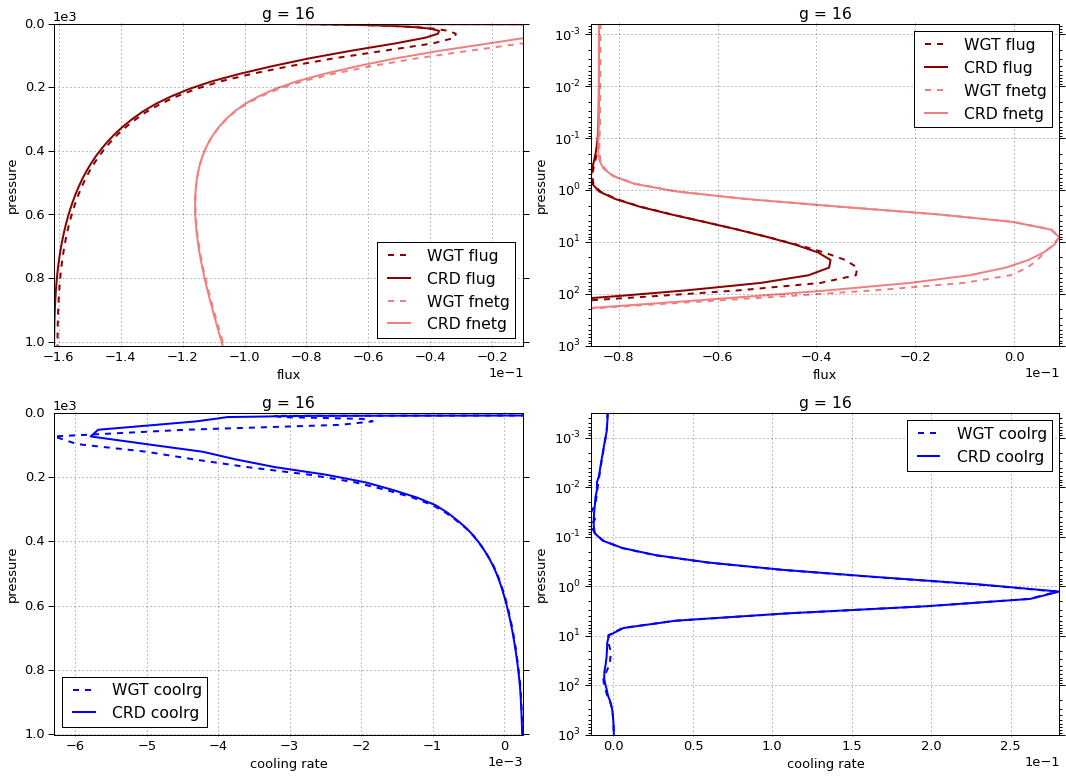

# Figure: flux, cooling rate. g-group 17

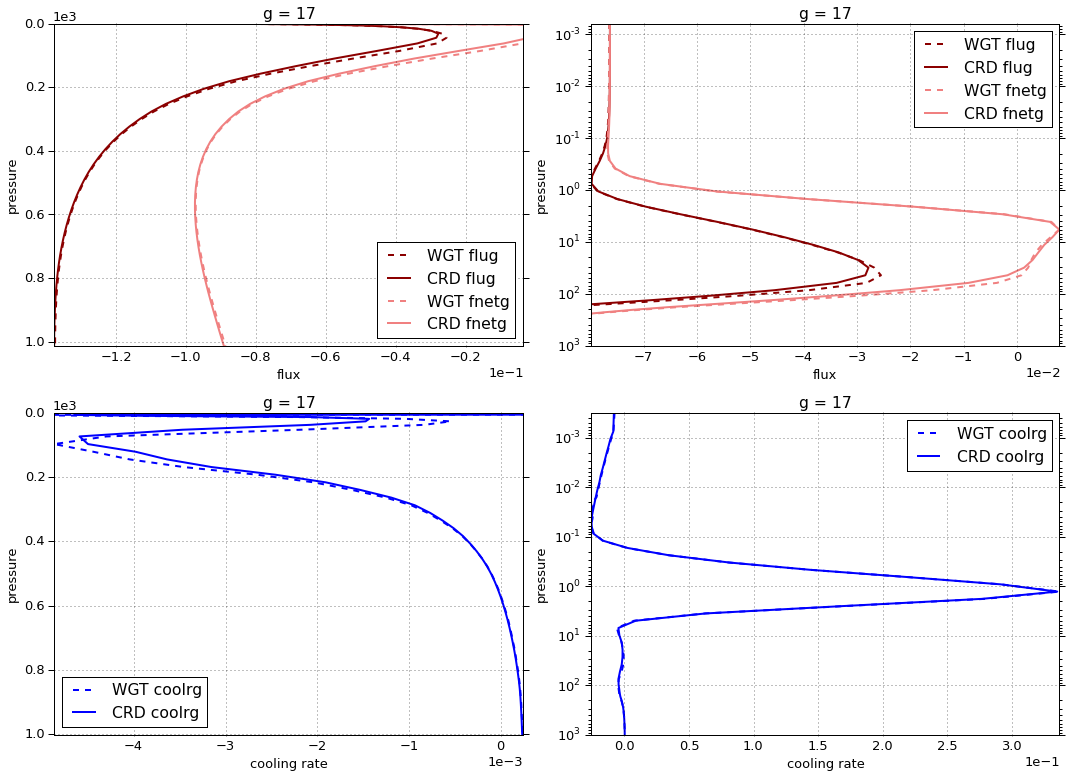

# Figure: flux, cooling rate. g-group 18

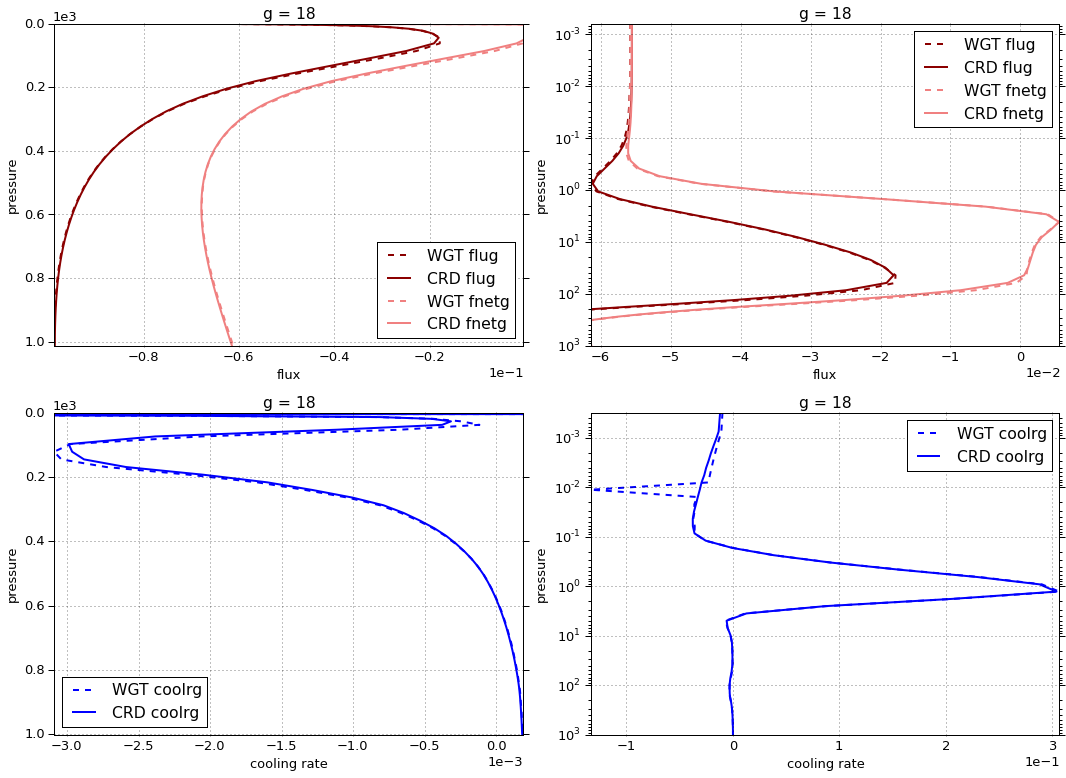

# Figure: flux, cooling rate. g-group 19

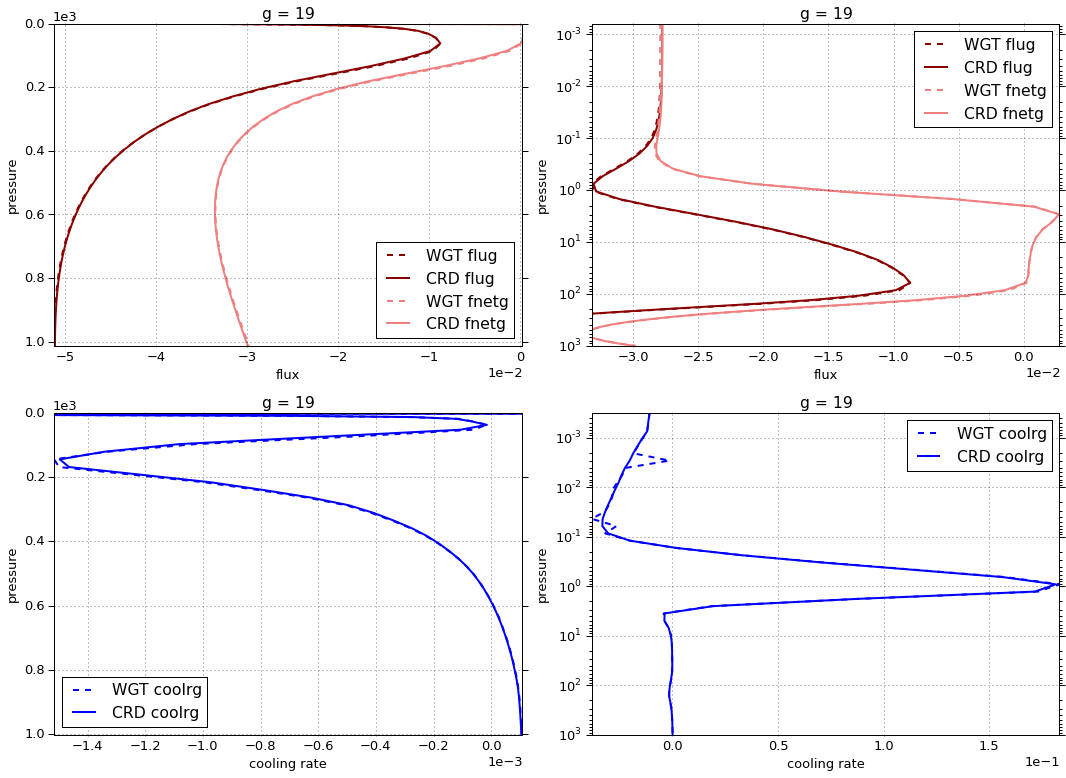

# Figure: flux, cooling rate. g-group 20

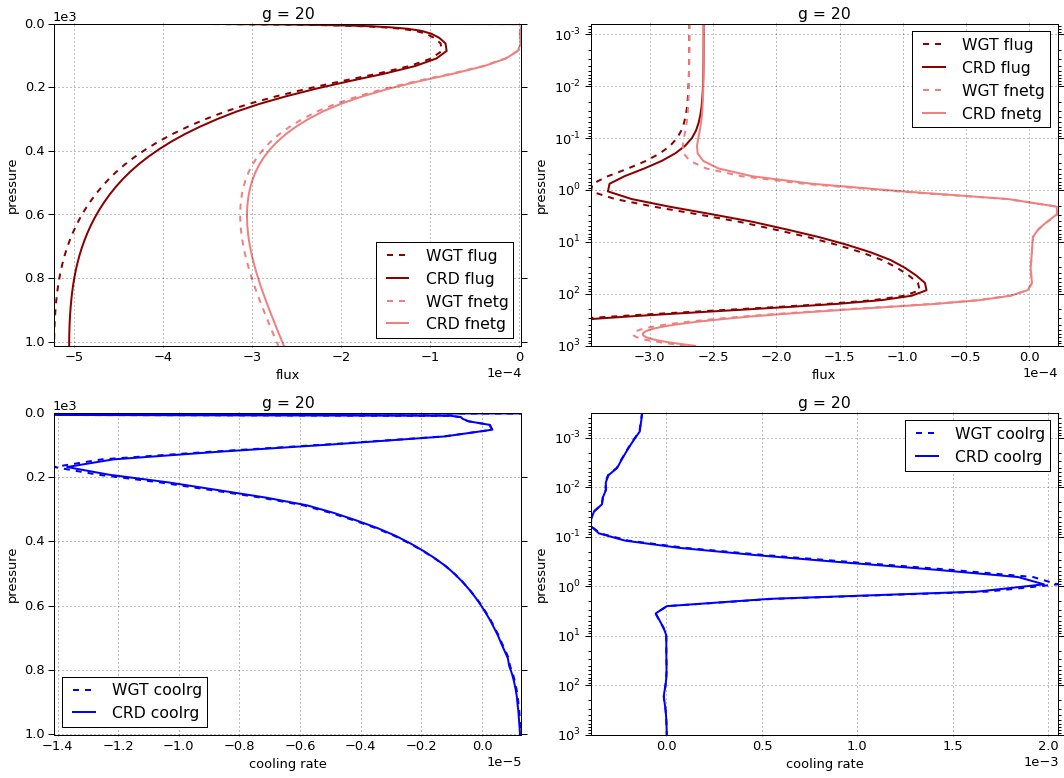

# Figure: flux, cooling rate. g-group total

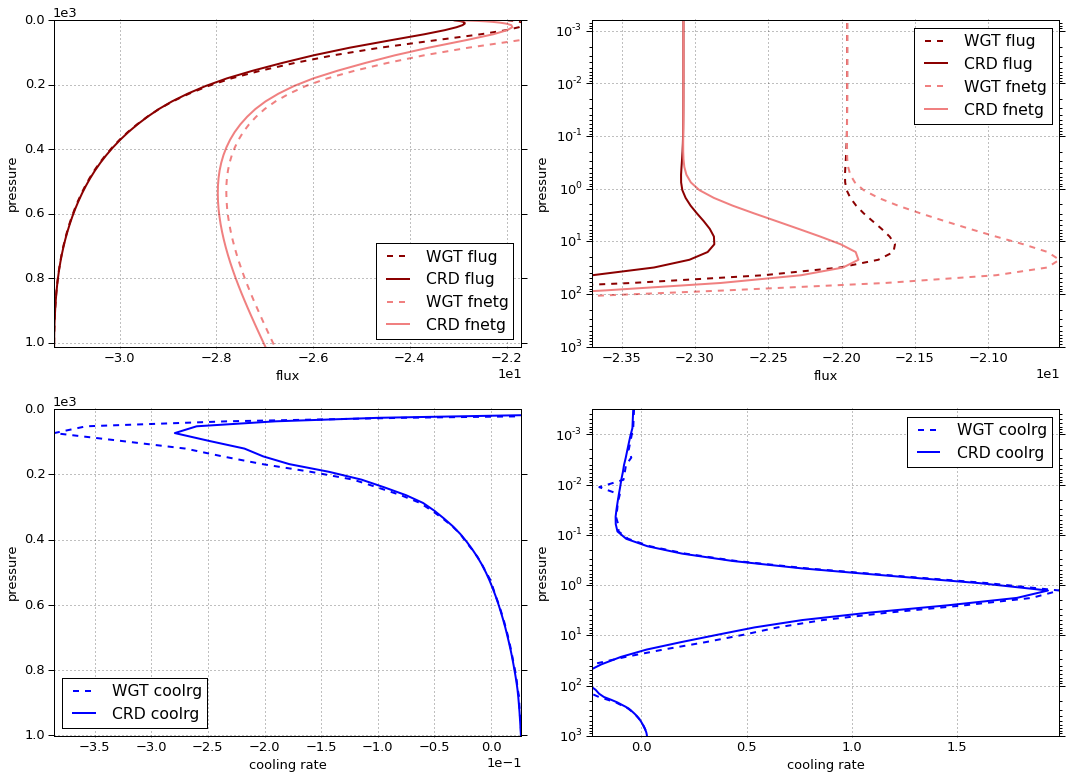

In [41]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [42]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -11.918459  0.000000 -11.918459
   1013     76    -12.291003  0.214274 -12.076729
2  0        1      -2.399401  0.000000  -2.399401
   1013     76     -2.805913  0.236490  -2.569423
3  0        1      -2.250791  0.000000  -2.250791
   1013     76     -3.043100  0.449048  -2.594052
4  0        1      -1.569774  0.000000  -1.569774
   1013     76     -2.628995  0.560944  -2.068051
5  0        1      -0.893620  0.000000  -0.893620
   1013     76     -1.997521  0.548723  -1.448798
6  0        1      -0.423571  0.000000  -0.423571
   1013     76     -1.292836  0.415324  -0.877512
7  0        1      -0.132970  0.000000  -0.132970
   1013     76     -0.514337  0.189679  -0.324658
8  0        1      -0.989894  0.000000  -0.989894
   1013     76     -1.870694  0.434440  -1.436255
9  0        1      -0.792744  0.000000  -0.792744
   1013     76     -1.486674  0.348150  -1.138524
10 0        1      -0.558257  0.000000  -0.558257
   1013     76     -1.069728  0.261492  -0.808237
11 0        1      -0.373087  0.000000  -0.373087
   1013     76     -0.735758  0.189852  -0.545906
12 0        1      -0.222344  0.000000  -0.222344
   1013     76     -0.472557  0.131556  -0.341001
13 0        1      -0.128493  0.000000  -0.128493
   1013     76     -0.294233  0.091761  -0.202472
14 0        1      -0.094046  0.000000  -0.094046
   1013     76     -0.214224  0.070401  -0.143824
15 0        1      -0.088051  0.000000  -0.088051
   1013     76     -0.187185  0.062142  -0.125043
16 0        1      -0.084017  0.000000  -0.084017
   1013     76     -0.161516  0.054477  -0.107039
17 0        1      -0.076323  0.000000  -0.076323
   1013     76     -0.137704  0.048511  -0.089193
18 0        1      -0.055561  0.000000  -0.055561
   1013     76     -0.098627  0.037141  -0.061485
19 0        1      -0.027765  0.000000  -0.027765
   1013     76     -0.051123  0.021202  -0.029922
20 0        1      -0.000257  0.000000  -0.000257
   1013     76     -0.000506  0.000242  -0.000264


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.121412  0.000000 -12.121412
   1013     76    -12.506682  0.217439 -12.289243
2  0        1      -2.342988  0.000000  -2.342988
   1013     76     -2.751857  0.236028  -2.515829
3  0        1      -2.193615  0.000000  -2.193615
   1013     76     -2.995375  0.452755  -2.542620
4  0        1      -1.515843  0.000000  -1.515843
   1013     76     -2.594563  0.569228  -2.025335
5  0        1      -0.857944  0.000000  -0.857944
   1013     76     -1.987858  0.562796  -1.425062
6  0        1      -0.405387  0.000000  -0.405387
   1013     76     -1.291794  0.426147  -0.865647
7  0        1      -0.130321  0.000000  -0.130321
   1013     76     -0.516822  0.194734  -0.322089
8  0        1      -0.668750  0.000000  -0.668750
   1013     76     -1.844674  0.485266  -1.359408
9  0        1      -0.481216  0.000000  -0.481216
   1013     76     -1.463720  0.396266  -1.067454
10 0        1      -0.329753  0.000000  -0.329753
   1013     76     -1.060818  0.295690  -0.765129
11 0        1      -0.229219  0.000000  -0.229219
   1013     76     -0.732644  0.208529  -0.524115
12 0        1      -0.157742  0.000000  -0.157742
   1013     76     -0.469791  0.136051  -0.333740
13 0        1      -0.107270  0.000000  -0.107270
   1013     76     -0.290027  0.089874  -0.200153
14 0        1      -0.089481  0.000000  -0.089481
   1013     76     -0.212686  0.068076  -0.144610
15 0        1      -0.087723  0.000000  -0.087723
   1013     76     -0.186558  0.060790  -0.125767
16 0        1      -0.083773  0.000000  -0.083773
   1013     76     -0.160429  0.053789  -0.106640
17 0        1      -0.076466  0.000000  -0.076466
   1013     76     -0.137436  0.048712  -0.088724
18 0        1      -0.055788  0.000000  -0.055788
   1013     76     -0.098766  0.037547  -0.061218
19 0        1      -0.027883  0.000000  -0.027883
   1013     76     -0.051212  0.021415  -0.029797
20 0        1      -0.000269  0.000000  -0.000269
   1013     76     -0.000523  0.000252  -0.000271


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0        1     -0.202953  0.000000 -0.202953
   1013     76    -0.215679  0.003165 -0.212514
2  0        1      0.056414  0.000000  0.056414
   1013     76     0.054056 -0.000462  0.053594
3  0        1      0.057176  0.000000  0.057176
   1013     76     0.047726  0.003707  0.051433
4  0        1      0.053930  0.000000  0.053930
   1013     76     0.034432  0.008284  0.042716
5  0        1      0.035677  0.000000  0.035677
   1013     76     0.009663  0.014073  0.023735
6  0        1      0.018184  0.000000  0.018184
   1013     76     0.001042  0.010823  0.011865
7  0        1      0.002648  0.000000  0.002648
   1013     76    -0.002486  0.005055  0.002569
8  0        1      0.321144  0.000000  0.321144
   1013     76     0.026020  0.050827  0.076847
9  0        1      0.311528  0.000000  0.311528
   1013     76     0.022954  0.048116  0.071070
10 0        1      0.228504  0.000000  0.228504
   1013     76     0.008910  0.034198  0.043108
11 0        1      0.143867  0.000000  0.143867
   1013     76     0.003114  0.018676  0.021790
12 0        1      0.064602  0.000000  0.064602
   1013     76     0.002766  0.004495  0.007261
13 0        1      0.021223  0.000000  0.021223
   1013     76     0.004206 -0.001887  0.002319
14 0        1      0.004564  0.000000  0.004564
   1013     76     0.001538 -0.002325 -0.000786
15 0        1      0.000328  0.000000  0.000328
   1013     76     0.000628 -0.001352 -0.000724
16 0        1      0.000244  0.000000  0.000244
   1013     76     0.001087 -0.000688  0.000400
17 0        1     -0.000143  0.000000 -0.000143
   1013     76     0.000268  0.000201  0.000469
18 0        1     -0.000227  0.000000 -0.000227
   1013     76    -0.000139  0.000406  0.000267
19 0        1     -0.000117  0.000000 -0.000117
   1013     76    -0.000089  0.000213  0.000125
20 0        1     -0.000011  0.000000 -0.000011
   1013     76    -0.000017  0.000011 -0.000006

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -8.277522e-05
   1001.112500 75     1.924490e-03
2  0.000312    1     -2.992914e-05
   1001.112500 75     2.007320e-03
3  0.000312    1     -4.328724e-05
   1001.112500 75     3.519557e-03
4  0.000312    1     -1.404700e-05
   1001.112500 75     3.814703e-03
5  0.000312    1     -4.571079e-06
   1001.112500 75     3.271911e-03
6  0.000312    1     -7.433459e-07
   1001.112500 75     2.229809e-03
7  0.000312    1     -1.268699e-08
   1001.112500 75     9.845565e-04
8  0.000312    1     -1.205749e-04
   1001.112500 75     2.342831e-03
9  0.000312    1     -2.123503e-04
   1001.112500 75     1.816811e-03
10 0.000312    1     -2.602795e-04
   1001.112500 75     1.304149e-03
11 0.000312    1     -3.402953e-04
   1001.112500 75     8.872254e-04
12 0.000312    1     -3.779710e-04
   1001.112500 75     5.765810e-04
13 0.000312    1     -4.041304e-04
   1001.112500 75     4.012252e-04
14 0.000312    1     -7.090927e-04
   1001.112500 75     3.094333e-04
15 0.000312    1     -1.603163e-03
   1001.112500 75     2.807227e-04
16 0.000312    1     -3.413717e-03
   1001.112500 75     2.522433e-04
17 0.000312    1     -8.161927e-03
   1001.112500 75     2.340427e-04
18 0.000312    1     -1.191866e-02
   1001.112500 75     1.832389e-04
19 0.000312    1     -1.077913e-02
   1001.112500 75     1.045988e-04
20 0.000312    1     -1.264951e-04
   1001.112500 75     1.251523e-06


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -8.566017e-05
   1001.112500 75     1.950359e-03
2  0.000312    1     -2.940756e-05
   1001.112500 75     2.083071e-03
3  0.000312    1     -2.361880e-05
   1001.112500 75     3.596932e-03
4  0.000312    1     -1.318217e-05
   1001.112500 75     3.916881e-03
5  0.000312    1     -4.043158e-06
   1001.112500 75     3.375760e-03
6  0.000312    1     -5.254414e-07
   1001.112500 75     2.269769e-03
7  0.000312    1      2.332996e-08
   1001.112500 75     1.016350e-03
8  0.000312    1     -2.121358e-05
   1001.112500 75     2.201946e-03
9  0.000312    1     -2.629773e-05
   1001.112500 75     1.747510e-03
10 0.000312    1     -3.889841e-05
   1001.112500 75     1.249456e-03
11 0.000312    1     -6.908302e-05
   1001.112500 75     8.575428e-04
12 0.000312    1     -1.511776e-04
   1001.112500 75     5.694158e-04
13 0.000312    1     -3.024199e-04
   1001.112500 75     4.078014e-04
14 0.000312    1     -6.627822e-04
   1001.112500 75     3.153541e-04
15 0.000312    1     -1.587987e-03
   1001.112500 75     2.872509e-04
16 0.000312    1     -3.762775e-03
   1001.112500 75     2.569887e-04
17 0.000312    1     -7.655273e-03
   1001.112500 75     2.377933e-04
18 0.000312    1     -9.687062e-03
   1001.112500 75     1.856643e-04
19 0.000312    1     -1.071284e-02
   1001.112500 75     1.057017e-04
20 0.000312    1     -1.281573e-04
   1001.112500 75     1.281063e-06


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -2.884958e-06
   1001.112500 75     2.586900e-05
2  0.000312    1      5.215800e-07
   1001.112500 75     7.575090e-05
3  0.000312    1      1.966844e-05
   1001.112500 75     7.737530e-05
4  0.000312    1      8.648330e-07
   1001.112500 75     1.021783e-04
5  0.000312    1      5.279204e-07
   1001.112500 75     1.038494e-04
6  0.000312    1      2.179044e-07
   1001.112500 75     3.995990e-05
7  0.000312    1      3.601695e-08
   1001.112500 75     3.179355e-05
8  0.000312    1      9.936128e-05
   1001.112500 75    -1.408853e-04
9  0.000312    1      1.860526e-04
   1001.112500 75    -6.930050e-05
10 0.000312    1      2.213811e-04
   1001.112500 75    -5.469270e-05
11 0.000312    1      2.712123e-04
   1001.112500 75    -2.968267e-05
12 0.000312    1      2.267934e-04
   1001.112500 75    -7.165210e-06
13 0.000312    1      1.017105e-04
   1001.112500 75     6.576230e-06
14 0.000312    1      4.631050e-05
   1001.112500 75     5.920810e-06
15 0.000312    1      1.517630e-05
   1001.112500 75     6.528130e-06
16 0.000312    1     -3.490586e-04
   1001.112500 75     4.745440e-06
17 0.000312    1      5.066542e-04
   1001.112500 75     3.750600e-06
18 0.000312    1      2.231598e-03
   1001.112500 75     2.425390e-06
19 0.000312    1      6.629400e-05
   1001.112500 75     1.102990e-06
20 0.000312    1     -1.662160e-06
   1001.112500 75     2.954020e-08

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.079424,0.000000,-23.079424
1013,76,-31.354235,4.365847,-26.988387



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.962843,0.000000,-21.962843
1013,76,-31.354235,4.561385,-26.792850



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.116581e+00,0.000000,1.116581
1013,76,-6.368900e-07,0.195537,0.195537


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038603
1001.112500,75,0.026447



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.034962
1001.112500,75,0.026633



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.003641
1001.112500,75,0.000186


In [43]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.398883,0.389774
2,0.087767,0.090180
3,0.095533,0.097590
4,0.082750,0.084193
5,0.063400,0.063745
6,0.041200,0.041184
7,0.016483,0.016344
8,0.058833,0.059956
9,0.046683,0.047679


In [ ]:
crd.data['dgdgs'].sum('g')

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    dg       float64 1.0
    dgs      float64 1.0

In [44]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')